In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('customer_shopping_data.csv')

In [52]:
df.columns = df.columns.str.replace('price','totalprices')
df

,invoice_no,customer_id,gender,age,category,quantity,totalprices,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [53]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
totalprices       0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [57]:
df.describe()

,age,quantity,totalprices
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [58]:
relevant_vars = ['shopping_mall', 'totalprices', 'category']

In [59]:
region_sales = df.groupby('shopping_mall')['totalprices'].sum().reset_index()
region_sales

,shopping_mall,totalprices
0,Cevahir AVM,3433671.84
1,Emaar Square Mall,3390408.31
2,Forum Istanbul,3336073.82
3,Istinye Park,6717077.54
4,Kanyon,13710755.24
5,Mall of Istanbul,13851737.62
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
8,Viaport Outlet,3414019.46
9,Zorlu Center,3509649.02


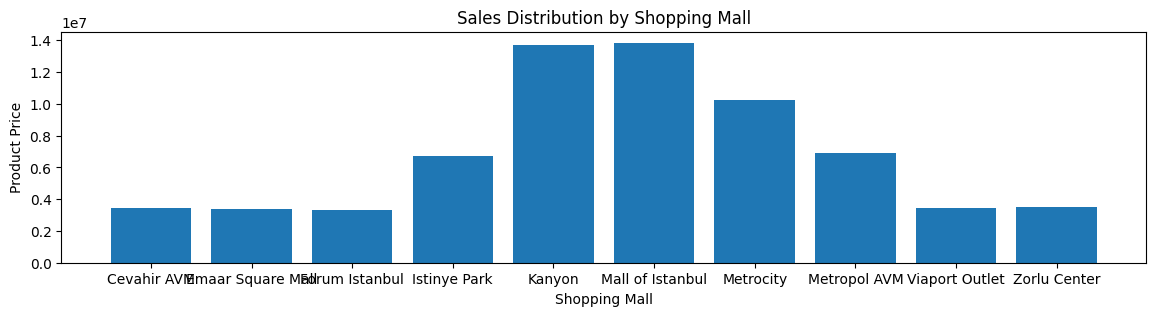

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(14,3))
plt.bar(region_sales['shopping_mall'], region_sales['totalprices'])
plt.title('Sales Distribution by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Product Price')
plt.show()
plt.tight_layout()

In [61]:
region_sales.sort_values(by='totalprices',ascending=False).head()

,shopping_mall,totalprices
5,Mall of Istanbul,13851737.62
4,Kanyon,13710755.24
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
3,Istinye Park,6717077.54


In [62]:
region_category_sales = df.groupby(['shopping_mall', 'category'])['totalprices'].sum().reset_index()
region_category_sales.value_counts()

shopping_mall   category    totalprices
Cevahir AVM     Books       11998.80       1
                Clothing    1554414.40     1
Metropol AVM    Cosmetics   185775.54      1
                Clothing    3166444.16     1
                Books       22240.20       1
                                          ..
Istinye Park    Clothing    3050313.20     1
                Books       20725.20       1
Forum Istanbul  Toys        55050.24       1
                Technology  706650.00      1
Zorlu Center    Toys        54691.84       1
Name: count, Length: 80, dtype: int64

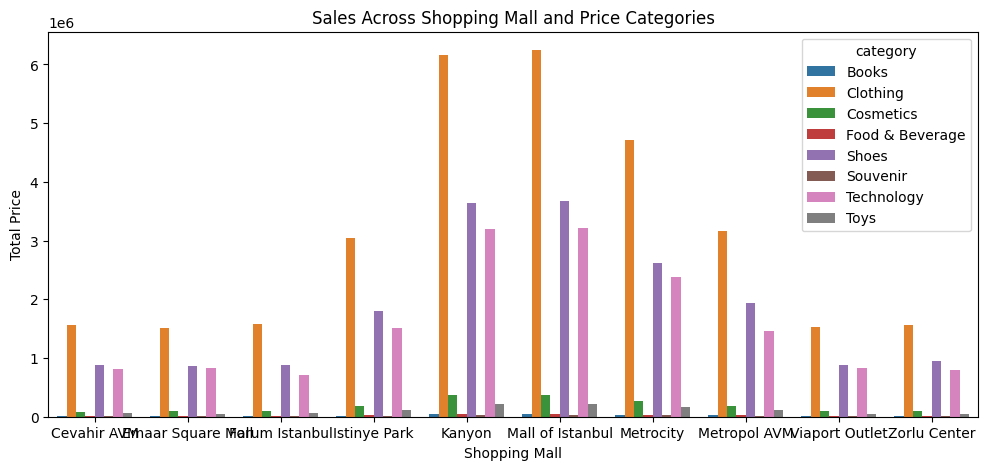

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(x='shopping_mall', y='totalprices', hue='category', data=region_category_sales)
plt.title('Sales Across Shopping Mall and Price Categories')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Price')
plt.show()
